## Import package and data

In [ ]:
import os
from google.colab import drive

# Navigate to Directory
drive.mount('/content/drive')

os.chdir("./drive/MyDrive/Spring 2024/DSO 574/Assignment 3")

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm

filepath = './Streaming Assignment/'

In [ ]:
# amazon_prime = pd.read_excel('/content/drive/MyDrive/Spring 2024/DSO 574/Assignment 3/Streaming Assignment/Ampere Analytics Data - OPTIONAL/Amazon Prime (excluding Amazon Other) catalogue USA 2016-2020.xlsx')
# netflix = pd.read_excel('/content/drive/MyDrive/Spring 2024/DSO 574/Assignment 3/Streaming Assignment/Ampere Analytics Data - OPTIONAL/Netflix catalogue USA 2016-2020.xlsx')

In [ ]:
# reach_data = pd.read_csv(filepath+'Nielsen Data - OPTIONAL/Reach Data 2016 to 2020.csv', low_memory=False, index_col=0)
# share_data = pd.read_csv(filepath+'Nielsen Data - OPTIONAL/Share Data 2016 to 2020.csv', low_memory=False, index_col=0)

In [ ]:
Reel_good_data = pd.read_csv(filepath+'ReelGood Data/Reel Good Data (Title+Service+Genre+Tag List).csv', low_memory=False, index_col=0)

In [ ]:
Reel_good_data.head()

,Title,URL,Type,Service,Genre,Tag,IMDB,ReelGood,AgeRating,Rated,Released Year,Duration Year,Seasons,What it's about,Where to Watch,Rent or Buy Available,Exclusive Service,Has Tag
0,Breaking Bad,/show/breaking-bad-2008,tv,netflix,Crime,"['Drug', 'Doctor', 'Teacher', 'Gangster', 'Hig...",9.5,100.0,18+,TV-MA,2008,2008-2020,5.0,"When Walter White, a New Mexico chemistry teac...",62 episodes (100%) are available to stream on ...,1,0,1
1,Breaking Bad,/show/breaking-bad-2008,tv,netflix,Drama,"['Drug', 'Doctor', 'Teacher', 'Gangster', 'Hig...",9.5,100.0,18+,TV-MA,2008,2008-2020,5.0,"When Walter White, a New Mexico chemistry teac...",62 episodes (100%) are available to stream on ...,1,0,1
2,Game of Thrones,/show/game-of-thrones-2011,tv,hbo_max,Drama,"['War', 'Royalty', 'Political', 'Based on Book...",9.3,98.0,18+,TV-MA,2011,2011-2020,8.0,Seven noble families fight for control of the ...,74 episodes (100%) are available to stream on ...,1,0,1
3,Game of Thrones,/show/game-of-thrones-2011,tv,hbo_max,Action & Adventure,"['War', 'Royalty', 'Political', 'Based on Book...",9.3,98.0,18+,TV-MA,2011,2011-2020,8.0,Seven noble families fight for control of the ...,74 episodes (100%) are available to stream on ...,1,0,1
4,Game of Thrones,/show/game-of-thrones-2011,tv,hbo_max,Fantasy,"['War', 'Royalty', 'Political', 'Based on Book...",9.3,98.0,18+,TV-MA,2011,2011-2020,8.0,Seven noble families fight for control of the ...,74 episodes (100%) are available to stream on ...,1,0,1


## EDA

In [ ]:
df = Reel_good_data.dropna(subset=['IMDB', 'ReelGood'])

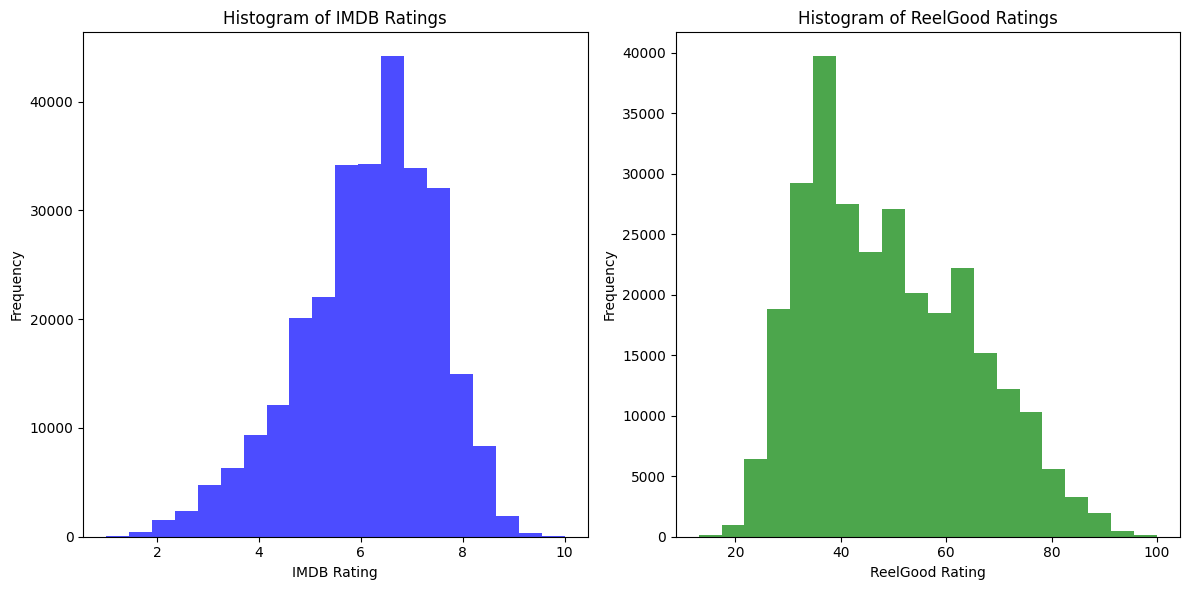

In [ ]:
# Creating histograms for the 'IMDB' and 'ReelGood' ratings
plt.figure(figsize=(12, 6))

# Histogram for IMDB ratings
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.hist(df['IMDB'], bins=20, color='blue', alpha=0.7)
plt.title('Histogram of IMDB Ratings')
plt.xlabel('IMDB Rating')
plt.ylabel('Frequency')

# Histogram for ReelGood ratings
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.hist(df['ReelGood'], bins=20, color='green', alpha=0.7)
plt.title('Histogram of ReelGood Ratings')
plt.xlabel('ReelGood Rating')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# Assuming 'df' is your main dataframe and 'top_data' has already been defined
# Calculate genre counts for all TV shows and movies
tv_genre_counts = df[df['Type'] == 'tv']['Genre'].value_counts()
movie_genre_counts = df[df['Type'] == 'movies']['Genre'].value_counts()

imdb_90_quantile = df['IMDB'].quantile(0.9)
reelgood_90_quantile = df['ReelGood'].quantile(0.9)

# Filter data that is higher than the 90th percentile for both ratings
top_data = df[(df['IMDB'] > imdb_90_quantile) & (df['ReelGood'] > reelgood_90_quantile)]

# Calculate genre counts for top TV shows and movies
top_tv_genre_counts = top_data[top_data['Type'] == 'tv']['Genre'].value_counts()
top_movie_genre_counts = top_data[top_data['Type'] == 'movies']['Genre'].value_counts()

# Reindex top data to match the full genre counts to ensure alignment in the plot
top_tv_genre_counts = top_tv_genre_counts.reindex(tv_genre_counts.index, fill_value=0)
top_movie_genre_counts = top_movie_genre_counts.reindex(movie_genre_counts.index, fill_value=0)

In [ ]:
# Create subplots
fig = go.Figure()

# Add TV genres data (bottom layer is total, top layer is top TV shows)

fig.add_trace(go.Bar(
    x=top_tv_genre_counts.index,
    y=top_tv_genre_counts.values,
    name='Top TV Shows',
    marker_color='navy'
))

fig.add_trace(go.Bar(
    x=tv_genre_counts.index,
    y=tv_genre_counts.values,
    name='All TV Shows',
    marker_color='lightblue'
))

# Update layout to add subplot configuration
fig.update_layout(
    barmode='stack',
    title='Genre Distribution for TV Shows',
    xaxis=dict(title='Genre', showgrid=True, gridcolor='grey'),
    yaxis=dict(title='Count', showgrid=True, gridcolor='grey'),
    plot_bgcolor='white',
    paper_bgcolor='white',
    width=800,
    height=600
)

fig.show()

In [ ]:
# Create subplots
fig = go.Figure()

# Add Movie genres data (bottom layer is total, top layer is top Movies)
fig.add_trace(go.Bar(
    x=top_movie_genre_counts.index,
    y=top_movie_genre_counts.values,
    name='Top Movies',
    marker_color='purple'
))

fig.add_trace(go.Bar(
    x=movie_genre_counts.index,
    y=movie_genre_counts.values,
    name='All Movies',
    marker_color='lightpink'
))

# Update layout to add subplot configuration
fig.update_layout(
    barmode='stack',
    title='Genre Distribution for Movies',
    xaxis=dict(title='Genre', showgrid=True, gridcolor='grey'),
    yaxis=dict(title='Count', showgrid=True, gridcolor='grey'),
    plot_bgcolor='white',
    paper_bgcolor='white',
    width=800,
    height=600
)

fig.show()

## Genre with high ratming but fewer show available

In [ ]:
imdb_90_quantile = df['IMDB'].quantile(0.9)
reelgood_90_quantile = df['ReelGood'].quantile(0.9)

# Filter data that is higher than the 90th percentile for both ratings
top_data = df[(df['IMDB'] > imdb_90_quantile) & (df['ReelGood'] > reelgood_90_quantile)]

In [ ]:
# Assuming 'df' is your main dataframe and 'top_data' has already been defined
# Calculate genre counts for all TV shows and movies
tv_genre_counts = df[df['Type'] == 'tv']['Genre'].value_counts()
movie_genre_counts = df[df['Type'] == 'movies']['Genre'].value_counts()

# Calculate genre counts for top TV shows and movies
top_tv_genre_counts = top_data[top_data['Type'] == 'tv']['Genre'].value_counts()
top_movie_genre_counts = top_data[top_data['Type'] == 'movies']['Genre'].value_counts()

# Calculate the percentage of shows available for rent or buy within each genre
tv_rent_or_buy = df[df['Type'] == 'tv'].groupby('Genre')['Rent or Buy Available'].mean() * 100
tv_exclusive_service = df[df['Type'] == 'tv'].groupby('Genre')['Exclusive Service'].mean() * 100

# Convert Series to DataFrame and reset index
tv_rent_or_buy = tv_rent_or_buy.reset_index()
tv_exclusive_service = tv_exclusive_service.reset_index()

# Rename columns for clarity
tv_rent_or_buy.columns = ['Genre', 'Rent_or_Buy_Percentage']
tv_exclusive_service.columns = ['Genre', 'Exclusive_Service_Percentage']

In [ ]:
# Merge the DataFrames on 'Genre'
merged_counts_tv = pd.merge(tv_genre_counts, top_tv_genre_counts, on='Genre', how='outer', suffixes=('_total', '_top'))

# Merge the new data into 'merged_counts_tv'
merged_counts_tv = pd.merge(merged_counts_tv, tv_rent_or_buy, on='Genre', how='left')
merged_counts_tv = pd.merge(merged_counts_tv, tv_exclusive_service, on='Genre', how='left')


# Replace NaN values with 0 where genres do not overlap
merged_counts_tv.fillna(0, inplace=True)

# Calculate the percentage of top counts relative to total counts for each TV genre
merged_counts_tv['percentage'] = round((merged_counts_tv['count_top'] / merged_counts_tv['count_total']) * 100,2)

# Calculate the ratio of percentage to count per TV genre
merged_counts_tv['ratio'] = (merged_counts_tv['percentage'] / merged_counts_tv['count_total']) * 100

# Sort the DataFrame by 'Percentage' in descending order
merged_counts_tv.sort_values(by='percentage', ascending=False)

,Genre,count_total,count_top,Rent_or_Buy_Percentage,Exclusive_Service_Percentage,percentage,ratio
24,LGBTQ,162,46.0,85.185185,17.283951,28.40,17.530864
15,Thriller,660,113.0,62.727273,28.939394,17.12,2.593939
22,Biography,278,41.0,66.906475,22.302158,14.75,5.305755
8,Anime,1653,231.0,65.396249,6.110103,13.97,0.845130
23,Musical,168,23.0,72.023810,20.238095,13.69,8.148810
0,Drama,6120,791.0,67.630719,21.813725,12.92,0.211111
6,Crime,2829,306.0,73.453517,17.921527,10.82,0.382467
12,Science-Fiction,1076,114.0,77.044610,17.472119,10.59,0.984201
2,Action & Adventure,4957,512.0,72.846480,14.121444,10.33,0.208392
10,Mystery,1158,119.0,71.502591,18.911917,10.28,0.887737


In [ ]:
merged_counts_tv.sort_values(by='count_total', ascending=False, inplace=True)

In [ ]:
import plotly.graph_objects as go

# Calculate the maximum values for count_top and count_total
max_x = merged_counts_tv['count_top'].max()
max_y = merged_counts_tv['count_total'].max()

# Determine if a point is below the line based on the previously defined slope (10:1)
slope = 100/10  # As previously adjusted, 10 units in y for every 1 in x

# Determine if a point is below the line
merged_counts_tv['highlight'] = merged_counts_tv.apply(lambda row: row['count_total'] > (slope * row['count_top']), axis=1)

# Create a scatter plot
fig = go.Figure()

# Add points to the plot
for i, row in merged_counts_tv.iterrows():
    # Choose color based on 'highlight' status
    color = 'lightpink' if row['highlight'] else 'lightblue'

    # Add scatter point
    fig.add_trace(go.Scatter(
        x=[row['count_top']],
        y=[row['count_total']],
        marker=dict(color=color, size=12),  # Larger and colored markers
        name='',
        showlegend=False,
        text=row['Genre'] if not row['highlight'] else '',  # Show genre text if highlight is True
        mode='markers+text',  # Combine markers and text
        textposition='top center',  # Position text above markers
        textfont=dict(size=12)  # Larger font size for text
    ))

# Add the diagonal line from (0, 0) to (max_x, max_y)
fig.add_shape(
    type="line",
    x0=0, y0=0, x1=max_x, y1=max_x * slope,
    line=dict(color="Black", width=4, dash="dot"),  # Thicker diagonal line
)

# Update layout and style
fig.update_layout(
    title='Top TV Shows vs Total TV Shows per Genre',
    xaxis_title="Count of Top TV Shows",
    yaxis_title="Total Count of TV Shows",
    width=1000,  # width and height for a square aspect ratio
    height=1000,
    plot_bgcolor='white',  # Set background color to white
    paper_bgcolor='white',  # Set the background color surrounding the plot to white
    xaxis=dict(
        showline=True,
        linewidth=2,
        linecolor='black',
        gridcolor='lightgrey'  # Light grey grid lines
    ),
    yaxis=dict(
        showline=True,
        linewidth=2,
        linecolor='black',
        gridcolor='lightgrey'  # Light grey grid lines
    )
)

fig.show()

In [ ]:
# Merge the DataFrames on 'Genre'
merged_counts_movie = pd.merge(movie_genre_counts, top_movie_genre_counts, on='Genre', how='outer', suffixes=('_total', '_top'))

# Replace NaN values with 0 where genres do not overlap
merged_counts_movie.fillna(0, inplace=True)

# Calculate the percentage of top counts relative to total counts for each movie genre
merged_counts_movie['percentage'] = round((merged_counts_movie['count_top'] / merged_counts_movie['count_total']) * 100,2)

# Calculate the ratio of percentage to count per movie genre
merged_counts_movie['ratio'] = (merged_counts_movie['percentage'] / merged_counts_movie['count_total']) * 100

# Sort the DataFrame by 'Percentage' in descending order
merged_counts_movie.sort_values(by='percentage', ascending=False, inplace=True)

merged_counts_movie = merged_counts_movie.reset_index()

merged_counts_movie

,Genre,count_total,count_top,percentage,ratio
0,Anime,274,30.0,10.95,3.996350
1,Cult,994,103.0,10.36,1.042254
2,Food,125,7.0,5.60,4.480000
3,Children,152,8.0,5.26,3.460526
4,Biography,5267,256.0,4.86,0.092273
5,History,4162,186.0,4.47,0.107400
6,LGBTQ,1617,46.0,2.84,0.175634
7,Travel,142,4.0,2.82,1.985915
8,Drama,48047,1357.0,2.82,0.005869
9,Musical,4478,125.0,2.79,0.062305


In [ ]:
import plotly.graph_objects as go

# Assuming merged_counts_movie has the columns 'count_top' and 'count_total'

# Calculate the maximum values for count_top and count_total in the new dataset
max_x = merged_counts_movie['count_top'].max()
max_y = merged_counts_movie['count_total'].max()

# Determine if a point is below the line based on the previously defined slope (4:1)
slope = 100/4

# Determine if a point is below the line
merged_counts_movie['highlight'] = merged_counts_movie.apply(lambda row: row['count_total'] > (slope * row['count_top']), axis=1)

# Create a scatter plot
fig = go.Figure()

# Add points to the plot
for i, row in merged_counts_movie.iterrows():
    # Choose color based on 'highlight' status
    color = 'lightpink' if row['highlight'] else 'lightblue'

    # Add scatter point
    fig.add_trace(go.Scatter(
        x=[row['count_top']],
        y=[row['count_total']],
        marker=dict(color=color, size=12),  # Larger and colored markers
        name='',
        showlegend=False,
        text=row['Genre'] if not row['highlight'] else '',  # Show genre text if highlight is True
        mode='markers+text',  # Combine markers and text
        textposition='top center',  # Position text above markers
        textfont=dict(size=12)  # Larger font size for text
    ))

# Add the diagonal line from (0, 0) to (max_x, max_y)
fig.add_shape(
    type="line",
    x0=0, y0=0, x1=max_x, y1=max_x * slope,
    line=dict(color="Black", width=4, dash="dot"),  # Thicker diagonal line
)

# Update layout and style
fig.update_layout(
    title='Top Movies vs Total Movies per Genre',
    xaxis_title="Count of Top Movies",
    yaxis_title="Total Count of Movies",
    width=1000,  # width and height for a square aspect ratio
    height=1000,
    plot_bgcolor='white',  # Set background color to white
    paper_bgcolor='white',  # Set the background color surrounding the plot to white
    xaxis=dict(
        showline=True,
        linewidth=2,
        linecolor='black',
        gridcolor='lightgrey'  # Light grey grid lines
    ),
    yaxis=dict(
        showline=True,
        linewidth=2,
        linecolor='black',
        gridcolor='lightgrey'  # Light grey grid lines
    )
)

fig.show()

## Nielsen data

In [ ]:
nielsen_data = pd.read_csv(filepath+'Nielsen Data - OPTIONAL/Reach Data 2016 to 2020.csv', low_memory=False, index_col=0)

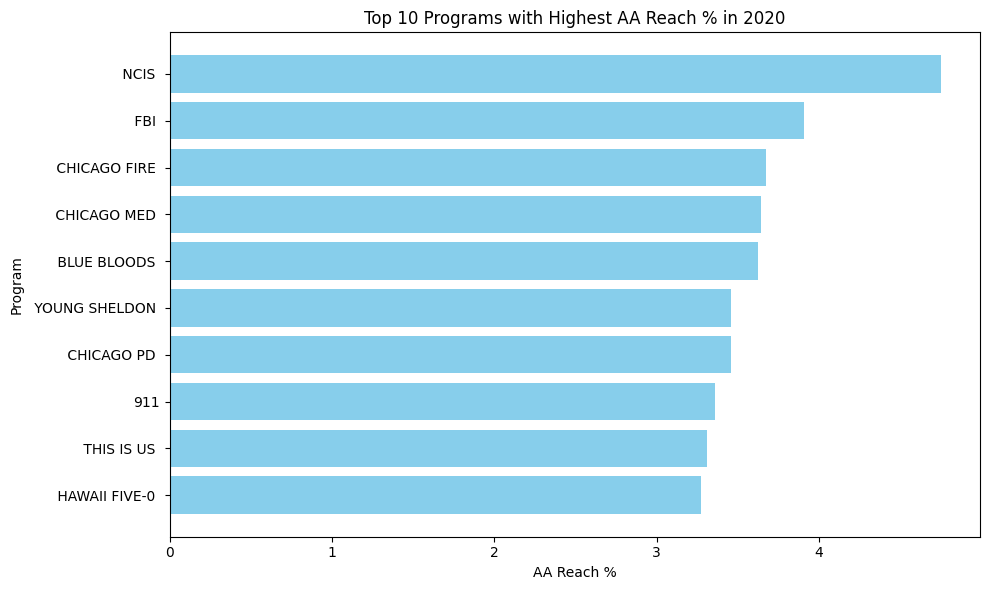

In [ ]:
# Assuming your DataFrame is named 'nielsen_data'
# Convert 'Date' column to datetime format
nielsen_data['Date'] = pd.to_datetime(nielsen_data['Date'])

# Filter data for the year 2020
nielsen_data_2020 = nielsen_data[nielsen_data['Date'].dt.year == 2020]

# Group data by program and find the mean AA Reach % for each program
program_reach_2020 = nielsen_data_2020.groupby('Program')['AA Reach%'].mean().reset_index()

# Sort programs by AA Reach % in descending order and get the top 10
top_10_programs = program_reach_2020.nlargest(10, 'AA Reach%')

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_10_programs['Program'], top_10_programs['AA Reach%'], color='skyblue')
plt.title('Top 10 Programs with Highest AA Reach % in 2020')
plt.xlabel('AA Reach %')
plt.ylabel('Program')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest reach at the top
plt.tight_layout()
plt.show()


In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Assuming your DataFrame is named 'nielsen_data'
# Convert 'Date' column to datetime format
nielsen_data['Date'] = pd.to_datetime(nielsen_data['Date'])

# Filter data for the year 2020
nielsen_data_2020 = nielsen_data[nielsen_data['Date'].dt.year == 2020]

# Group data by program and find the mean AA Reach % for each program
program_reach_2020 = nielsen_data_2020.groupby('Program')['AA Reach%'].mean().reset_index()

# Sort programs by AA Reach % in descending order and get the top 10
top_10_programs = program_reach_2020.nlargest(10, 'AA Reach%')

# Create a horizontal bar chart using Plotly
fig = go.Figure(go.Bar(
    x=top_10_programs['AA Reach%'],
    y=top_10_programs['Program'],
    orientation='h',
    marker_color='lightblue'  # Bar color
))

# Update layout for aesthetics
fig.update_layout(
    title='Top 10 Programs with Highest AA Reach % in 2020',
    xaxis_title='AA Reach %',
    yaxis_title='Program',
    paper_bgcolor='white',  # Background color of the plotting area
    plot_bgcolor='white',  # Background color of the data area
    xaxis=dict(showgrid=True, gridcolor='grey'),  # Grey grid lines
    yaxis=dict(showgrid=False),  # No grid lines for the Y-axis
)

# Reverse the order of the y-axis to put the highest values on top
fig['layout']['yaxis']['autorange'] = "reversed"

fig.show()


## Service explore

In [ ]:
df.head()

df_filtered = df.drop_duplicates(subset=['Title', 'Service'])

In [ ]:
pd.set_option('display.max_rows', None)

services = pd.DataFrame(df_filtered['Service'].value_counts()).sort_values(by='count',ascending=False).reset_index()

services.columns = ['Service', 'count_total']

In [ ]:
rent_or_buy = df_filtered[df_filtered['Rent or Buy Available'] == 1].groupby('Service').size()
exclusive_service = df_filtered[df_filtered['Exclusive Service'] == 1].groupby('Service').size()

imdb_service = df_filtered.groupby('Service')['IMDB'].mean()
realgood_service = df_filtered.groupby('Service')['ReelGood'].mean()

# Convert Series to DataFrame and reset index
rent_or_buy = rent_or_buy.reset_index()
exclusive_service = exclusive_service.reset_index()
imdb_service = imdb_service.reset_index()
realgood_service = realgood_service.reset_index()

# Rename columns for clarity
rent_or_buy.columns = ['Service', 'count_buy']
exclusive_service.columns = ['Service', 'count_exclusive_service']
imdb_service.columns = ['Service', 'avg_imdb_rating']
realgood_service.columns = ['Service', 'avg_reelgood_rating']

In [ ]:
# Merge the new data into 'merged_counts'
merged_counts_service = pd.merge(services, rent_or_buy, on='Service', how='left')
merged_counts_service = pd.merge(merged_counts_service, exclusive_service, on='Service', how='left')
merged_counts_service = pd.merge(merged_counts_service, imdb_service, on='Service', how='left')
merged_counts_service = pd.merge(merged_counts_service, realgood_service, on='Service', how='left')

# Calculate the percentage of top counts relative to total counts for each TV genre
merged_counts_service['buy_percentage'] = round((merged_counts_service['count_buy'] / merged_counts_service['count_total']) * 100,2)

# Calculate the ratio of percentage to count per TV genre
merged_counts_service['exclusive_service_percentage'] = (merged_counts_service['count_exclusive_service'] / merged_counts_service['count_total']) * 100

In [ ]:
merged_counts_service.sort_values(by='count_total', ascending=False)

,Service,count_total,count_buy,count_exclusive_service,avg_imdb_rating,avg_reelgood_rating,buy_percentage,exclusive_service_percentage
0,free,18485,15637.0,1.0,5.885015,44.962672,84.59,0.005410
1,Rent or Buy,17983,17983.0,17983.0,6.165378,45.414225,100.00,100.000000
2,amazon_prime,13625,12121.0,784.0,5.960925,43.916771,88.96,5.754128
3,tubi_tv,13531,11906.0,NaN,5.698825,43.089055,87.99,NaN
4,hoopla,6668,6197.0,203.0,6.124895,49.524745,92.94,3.044391
5,netflix,4838,2012.0,2678.0,6.566060,55.307152,41.59,55.353452
6,kanopy,4366,3454.0,479.0,6.723271,53.869217,79.11,10.971141
7,plutotv,3640,3242.0,NaN,6.010495,47.953297,89.07,NaN
8,vudu_free,3429,3387.0,NaN,5.605949,43.647127,98.78,NaN
9,plex_free,3038,2536.0,NaN,5.819750,45.625082,83.48,NaN


In [ ]:
platform = df.pivot_table(index='Genre', columns='Service', values='Title', aggfunc='count', fill_value=0)

pd.set_option('display.max_columns', None)

platform

Service,60_minutes_all_access,Rent or Buy,abc,abc_family,abc_news,abc_tveverywhere,acorntv,adult_swim,adult_swim_tveverywhere,ae,ae_tveverywhere,ahc_go,amazon_prime,amazon_prime_free,amc,amc_premiere,ameb,animal_planet_go,apple_tv_plus,bbc_america_tve,best,bet,bet_plus,bet_tveverywhere,bounce_tv,bravo_tveverywhere,britbox,cartoon_network,cartoon_network_free,cbs,cbs_,cbs_all_access,cine,cinemax,cmt,cmt_tve,cnbc,cnbc_tveverywhere,collegehumor,come,comedy,comedycentral_tveverywhere,comedycentralstandupplus,cont,crackle,criterion_channel,crunchyroll_free,crunchyroll_premium,curiositystream,cw_seed,dari,dc_universe,dest,destination_america_go,discovery_go,discovery_life_go,disney_junior,disney_plus,disneynow,disneynow_free,diy,docc,docu,dove,dox,epix,fandor,fear,film,food_network,fox,fox_tveverywhere,free,freeform_free,fubo_tv,full,funimation,funny_or_die,fuse_tv,fx_tveverywhere,fyi,fyi_tveverywhere,gaia,hallmark_everywhere,hallmark_movies_now,hbo,hbo_max,here,hgtv,hist,history,history_tveverywhere,hiya,hoopla,hulu_plus,ifc,imdb_tv,indi,indieflix,investigation_discovery,investigation_discovery_go,kanopy,life,lifetime,lifetime_tveverywhere,logo,logo_tve,mhzc,mons,moto,mtv,mtv_tveverywhere,mubi,natgeo,natgeo_kids_free,natgeo_tveverywhere,nbc,nbc_news,nbc_news_tveverywhere,nbc_tveverywhere,nbc_universo,netflix,nickjr,oxygen,oxygen_tveverywhere,paramount_network_tve,pbs,pbs_kids,peacock,peacock_free,philo,plex_free,plutotv,pop,popcornflix,qell,real,revry,science_go,scre,secr,shout_factory_tv,shoutfactorytv,showtime,showtime_free,shudder,smit,smithsonian,southpark,spike,spike_tveverywhere,sprout_now,starz,sundance_tveverywhere,sundancenow,syfy,syfy_tveverywhere,tbs,teamcoco,telemundo_now,thecw,tlc,tlc_go,tnt,travel,trib,true,trutv_tveverywhere,tubi_tv,tvland,tvland_tveverywhere,upfa,urbanmoviechannel,usa,usa_tveverywhere,velocity_go,vh1,vh1_tveverywhere,viceland_free,viceland_tve,viewster,vimeo,vudu_free,warr,watch_cooking_channel,watch_diy_network,watch_food_network,watch_hgtv,watch_tcm,watch_travel_channel,watchdisney,watchdisneyjr,watchdisneyjr_tveverywhere,watchdisneyxd,watchdisneyxd_tveverywhere,we_tveverywhere,wwe_network,xive,youtube,youtube_premium,youtube_premium_free
Genre,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Action & Adventure,0,4307,8,13,1,0,24,39,26,1,4,0,3347,0,49,45,19,15,6,7,3,1,11,1,0,0,27,20,18,14,0,138,15,98,1,1,0,0,0,0,2,3,1,111,242,182,271,47,5,12,8,59,7,6,32,1,0,436,38,22,0,0,13,44,2,705,204,7,1,2,4,10,4581,3,503,5,302,0,0,1,0,0,12,3,17,231,519,2,1,0,0,4,50,1408,599,4,341,1,1,0,6,404,2,0,0,0,0,0,7,1,2,2,0,3,1,6,37,0,0,9,1,1144,0,0,1,0,0,14,32,240,133,769,917,0,242,0,0,2,5,2,4,34,138,126,1,50,1,0,0,0,0,0,508,5,15,1,58,43,0,5,15,0,1,43,3,31,5,0,3251,0,0,23,11,6,10,0,0,0,0,0,0,1,846,25,0,0,2,2,23,3,2,1,3,4,10,1,5,0,2,13,9
Animation,0,1024,0,1,1,0,0,64,43,0,0,0,536,0,1,1,28,0,3,1,0,0,1,0,0,0,3,24,23,1,0,38,2,1,0,0,0,0,0,0,11,12,7,23,22,54,508,85,5,4,1,41,0,0,2,0,2,273,40,29,0,0,1,20,0,14,96,0,0,0,5,2,1420,0,142,0,522,0,0,5,0,0,1,0,0,49,234,0,0,0,0,0,0,404,443,0,58,0,0,0,0,162,0,0,0,0,0,0,0,0,4,4,0,0,1,0,1,0,0,0,0,537,1,0,0,0,1,31,36,61,37,153,136,0,14,0,0,1,0,0,0,4,17,4,1,3,0,0,1,0,0,1,123,1,2,0,6,7,0,0,0,0,0,1,0,0,0,1,615,0,0,6,0,0,0,0,0,0,0,1,1,1,124,0,0,0,0,0,0,0,2,5,8,4,10,0,1,0,0,1,6
Anime,0,73,0,0,0,0,0,17,14,0,0,0,58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,349,67,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,427,0,5,0,338,0,0,0,0,0,0,0,0,0,45,0,0,0,0,0,0,41,183,0,1,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,140,0,0,0,0,0,0,0,0,0,6,14,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,116,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Biography,0,906,1,0,0,0,6,0,0,1,2,0,562,0,5,5,0,0,3,0,0,1,3,2,0,0,15,0,0,0,0,16,2,17,1,1,0,0,0,1,0,0,0,13,36,66,0,0,8,0,5,0,1,0,0,0,0,24,0,0,0,0,24,8,

In [ ]:
platform

In [ ]:
netflix = pd.read_excel('/content/drive/MyDrive/Spring 2024/DSO 574/Assignment 3/Streaming Assignment/Ampere Analytics Data - OPTIONAL/Netflix catalogue USA 2016-2020.xlsx')

In [ ]:
netflix.head()

,YearMonth,Platform,Country,Content Type,Title,First Release Year,Primary Genre,SecondaryGenre,Genre,Duration,Duration Group,Number of Episodes,Primary Production Country,Primary Production Company
0,Jan-2016,Netflix,USA,Movie,[rec] 3: Genesis,2012,Horror,Comedy,Horror - Comedy,80,60 - 90 minutes,-,Spain,Filmax
1,Jan-2016,Netflix,USA,Movie,[rec] 4: Apocalypse,2014,Horror,Action & Adventure,Horror - Action & Adventure,95,90 - 120 minutes,-,Spain,Entertainment One
2,Jan-2016,Netflix,USA,Movie,#chicagogirl: the Social Network Takes on a Di...,2015,Documentary,Political,Documentary - Political,73,60 - 90 minutes,-,USA,Revolutio
3,Jan-2016,Netflix,USA,TVSeason,#deathtoselfie With Steven Furtick: Season 1,2014,Miscellaneous,Miscellaneous,Miscellaneous - Miscellaneous,520,45 - 60 minutes,10,USA,No Company Assigned
4,Jan-2016,Netflix,USA,Movie,1 Chance 2 Dance,2014,Romance,Drama,Romance - Drama,85,60 - 90 minutes,-,USA,DAVED Productions
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410678,Dec-2020,Netflix,USA,TVSeason,深夜食堂: Season 2,2011,Comedy,Drama,Comedy - Drama,240,15 - 30 minutes,10,Japan,Amuse
410679,Dec-2020,Netflix,USA,TVSeason,王女未央 Biou: Season 1,2017,Drama,Historical,Drama - Historical,2376,30 - 45 minutes,54,China,Ningxia Film Group
410680,Dec-2020,Netflix,USA,TVSeason,王子様をオトせ！: Season 1,2014,Romance,Comedy,Romance - Comedy,1716,30 - 45 minutes,39,China,Sanlih E-Television
410681,Dec-2020,Netflix,USA,TVSeason,聖闘士星矢: Season 1,1986,Sci-Fi & Fantasy,Animation,Sci-Fi & Fantasy - Animation,1752,15 - 30 minutes,73,Japan,Toei Animation


In [ ]:
reach_data = pd.read_csv(filepath+'Nielsen Data - OPTIONAL/Reach Data 2016 to 2020.csv', low_memory=False, index_col=0)

In [ ]:
reach_data

,Coverage Area,Market Break,Demographic,Schedule Name,Date,Originator,Program,Playback Period,Units,AA Reach%,...,Qualified AA GRP%,Spot AA GRP Proj(units),Qualified AA GRP Proj(units),AA Effective Reach(3+),Weighted Intab,PESS,Unified Count,UE (000),UE/Proj Type,File
0,Total US,Composite,Persons 2 - 99,USC Marshall Reach 2018 v1,01/01/2018,COMEDY CENTRAL,CHAPPELLES SHOW,Live+7 Days (+168 Hours) | TV with Digital | L...,6,0.479660,...,1.086498,68015665,3311940,0.143063,304499468,43551,73452,304827,S,USC Marshall Reach 2018 v1.xlsx
1,Total US,Composite,Persons 2 - 99,USC Marshall Reach 2018 v1,01/01/2018,AMC,BREAKING BAD MARATHON,Live+7 Days (+168 Hours) | TV with Digital | L...,2,0.259126,...,0.386566,47466710,1178358,0.004686,304499468,43551,73452,304827,S,USC Marshall Reach 2018 v1.xlsx
2,Total US,Composite,Persons 2 - 99,USC Marshall Reach 2018 v1,01/01/2018,CBS,"BIG BANG THEORY, THE-1/1",Live+7 Days (+168 Hours) | TV with Digital | L...,1,2.107874,...,2.116748,151299653,6452420,0.000407,304499468,43551,73452,304827,S,USC Marshall Reach 2018 v1.xlsx
3,Total US,Composite,Persons 2 - 99,USC Marshall Reach 2018 v1,01/01/2018,NBC,BETTER LATE THAN NEVER,Live+7 Days (+168 Hours) | TV with Digital | L...,1,2.038779,...,2.137488,253579666,6515641,0.004577,304499468,43551,73452,304827,S,USC Marshall Reach 2018 v1.xlsx
4,Total US,Composite,Persons 2 - 99,USC Marshall Reach 2018 v1,01/01/2018,CBS,YOUNG SHELDON 830PM-SP,Live+7 Days (+168 Hours) | TV with Digital | L...,1,1.930053,...,1.938229,147864817,5908244,0.000000,304499468,43551,73452,304827,S,USC Marshall Reach 2018 v1.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37461,Total US,HHLD w/ SVOD Service = Any = No - SUBSCRIPTION,Persons 2 - 99,USC Marshall Reach 2017 v1,12/30/2017,FOX,LETHAL WEAPON-SP 12/30 9P,Live+7 Days (+168 Hours) | TV with Digital | L...,1,0.885053,...,0.885053,35264824,892966,0.000000,100894126,13411,23105,100894,C,USC Marshall Reach 2017 v1.xlsx
37462,Total US,HHLD w/ SVOD Service = Any = No - SUBSCRIPTION,Persons 2 - 99,USC Marshall Reach 2017 v1,12/31/2017,AMC,BREAKING BAD MARATHON,Live+7 Days (+168 Hours) | TV with Digital | L...,4,0.500318,...,1.034101,46385392,1043347,0.170518,100894126,13411,23105,100894,C,USC Marshall Reach 2017 v1.xlsx
37463,Total US,HHLD w/ SVOD Service = Any = No - SUBSCRIPTION,Persons 2 - 99,USC Marshall Reach 2017 v1,12/31/2017,CBS,S.W.A.T. SPECIAL-12/31,Live+7 Days (+168 Hours) | TV with Digital | L...,1,2.476153,...,2.487769,93051432,2510013,0.000000,100894126,13411,23105,100894,C,USC Marshall Reach 2017 v1.xlsx
37464,Total US,HHLD w/ SVOD Service = Any = No - SUBSCRIPTION,Persons 2 - 99,USC Marshall Reach 2017 v1,12/31/2017,CBS,SEAL TEAM SPECIAL-12/31,Live+7 Days (+168 Hours) | TV with Digital | L...,1,2.188626,...,2.231569,81804592,2251522,0.006924,100894126,13411,23105,100894,C,USC Marshall Reach 2017 v1.xlsx
